In [7]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import sys
sys.path.append('../')

from Kohonen_SOM import SOM

In [58]:
w = widgets.IntSlider(min=0, max=10)
t = widgets.FloatSlider(min=0.0, max=1.0)
display(w,t)

IntSlider(value=0, max=10)

FloatSlider(value=0.0, max=1.0)

In [17]:
w.value

50

In [51]:
b = button = widgets.Button(
    description='Create map',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Begins the SOM map creation process',
    icon='' # (FontAwesome names without the `fa-` prefix)
    )
display(b)



Button(button_style='success', description='Create map', style=ButtonStyle(), tooltip='Begins the SOM map crea…

success


In [52]:
def success(_):
    print("success")
b.on_click(success)

In [2]:
#Generate data
train_data = np.array([[0,0,1],[0,1,0],[0,0,0],[0,1,1],[0,0,0],[0,1,0],[0,0,1],
                       [0,0,1],[0,0,0.8],[0,0,0.91],[1,0,0.95],[0,0,0.949]])      

In [3]:
#Instantiate the SOM classs
som_maker = SOM() 

In [4]:
#Train the SOM
som = SOM.generate_SOM(som_maker,x_size=20,y_size=20,your_data=train_data,initial_radius=20,
                       number_of_iterations=100,initial_learning_rate=0.1)       

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 419.04it/s]


In [5]:
#Evaluate data on the trained map
tested_data = SOM.evaluate(som_maker,train_data,som)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 34.22it/s]


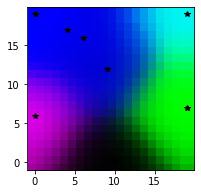

In [6]:
#Plot the evaluated data 
plt.figure(figsize=(3,3))
for i in tqdm(range(som.shape[1])):
        for  j in range(som.shape[0]):
                plt.plot(j,i,'s',color=som[j,i],markersize=15.0,zorder=0)
plt.plot(tested_data[0],tested_data[1],'k*',zorder=1)